<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/%EB%8F%85%EC%9D%BC_%EC%8B%A0%ED%8F%89%EC%82%AC_%EB%AC%B8%EC%A0%9C_4_a%2Cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

독일 신평사 문제 - 4번 a,b 문제 풀이

모델 성능 향상을 위해 노력해봅시다. 신청자의 신용 상태를 그대로 받아들이지 말고 로지스틱 회귀의 추정 확률(성공은 1)을 근거로 신용 우량 등급자를 먼저 분류하고, 이어서 신용 불량 등급자를 분류하시오. 검증 데이터셋으로부터 순이익을 포함하는 벡터를 만드시오. 이 벡터를 사용해 순이익을 포함하는 유효성 검증 데이터셋에 대한 누적 이득 차트를 만드시오.

a. 최대 순이익을 얻으려면 검증 데이터 값을 어디까지 입력해야 하는가? (일반적으로 이 값은 백분위수로 지정되거나 십진수로 반올림 된다)

b. 이 로지스틱 회귀 모델을 향후 대출 신청자의 신용 평가에 사용한다면, 대출 허용을 위해 어떤 '성공 확률 컷오프'를 사용해야 하는가?

<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-b3fa7ad6ce31>:63: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

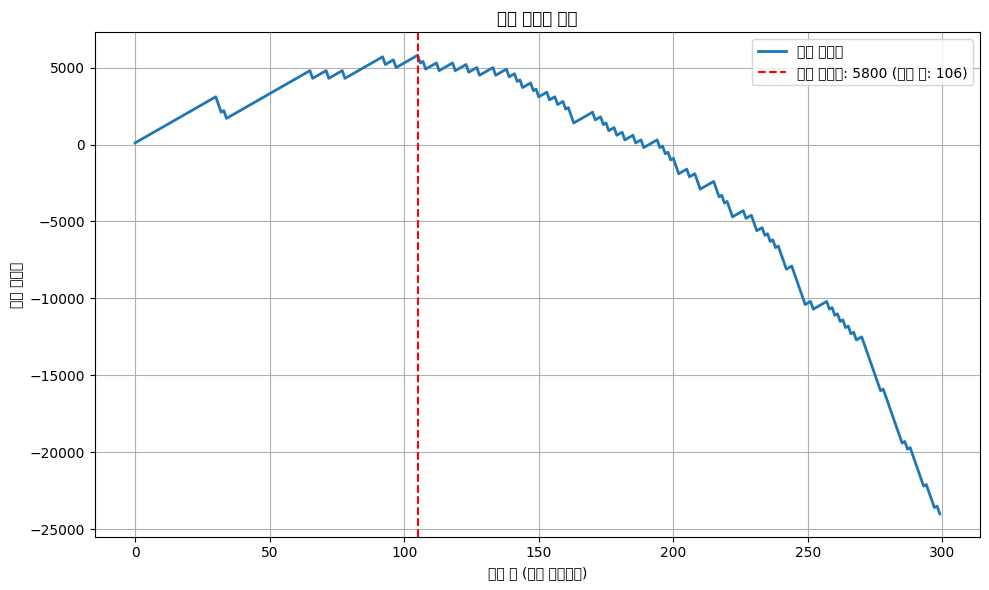

✅ 최대 순이익: 5800
✅ 해당 고객 수: 106
✅ 컷오프 확률: 0.865
✅ 누적 백분위수: 35.0%


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. 파일 불러오기
df = pd.read_csv("GermanCredit (1).csv")

# 2. 결측치가 있는 컬럼 제거
df = df.dropna(axis=1, how='any')  # 전체 제거 대신 열 단위로 제거

# 3. 특성과 타겟 분리
X = df.drop(columns=['RESPONSE', 'OBS#'], errors='ignore')
y = df['RESPONSE']

# 4. 원-핫 인코딩
X = pd.get_dummies(X, drop_first=True)

# 5. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 6. 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 8. 예측 확률 계산
probs = model.predict_proba(X_test_scaled)[:, 1]

# 9. 결과 구성
results = pd.DataFrame({
    'true_label': y_test.values,
    'prob_success': probs
}).sort_values(by='prob_success', ascending=False).reset_index(drop=True)

# 10. 이익 계산 (성공 100, 실패 -500)
results['profit'] = results['true_label'].apply(lambda x: 100 if x == 1 else -500)
results['cumulative_profit'] = results['profit'].cumsum()

# 11. 최대 순이익 계산
max_idx = results['cumulative_profit'].idxmax()
max_profit = results.loc[max_idx, 'cumulative_profit']
cutoff_prob = results.loc[max_idx, 'prob_success']
cutoff_percentile = round((max_idx + 1) / len(results), 2)

# 12. 시각화
plt.figure(figsize=(10, 6))
plt.plot(results['cumulative_profit'], label='누적 순이익', linewidth=2)
plt.axvline(x=max_idx, color='red', linestyle='--', label=f'최대 순이익: {max_profit} (고객 수: {max_idx + 1})')
plt.xlabel('고객 수 (확률 내림차순)')
plt.ylabel('누적 순이익')
plt.title('누적 순이익 차트')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 13. 결과 출력
print(f"✅ 최대 순이익: {max_profit}")
print(f"✅ 해당 고객 수: {max_idx + 1}")
print(f"✅ 컷오프 확률: {round(cutoff_prob, 3)}")
print(f"✅ 누적 백분위수: {cutoff_percentile * 100}%")


해당 결과를 통해 a,b의 답을 도출할 수 있다

a. 35%  b. 86.5%




✅ a. 고객 백분위수
▶ 의미:
전체 고객 중 성공 확률이 가장 높은 상위 35%의 고객에게만 대출을 승인하면,

누적 순이익이 가장 커진다는 의미입니다.

📈 왜 필요한가?
대출을 아무에게나 승인하면, 상환 실패로 **큰 손실(-500)**이 발생할 수 있습니다.

반대로 너무 엄격하면 좋은 고객도 놓쳐 **수익(+100)**을 얻을 기회를 잃습니다.

따라서 **가장 이익이 나는 지점(= 상위 몇 % 고객까지만 승인할 것인지)**을 찾아야 합니다.

🎯 실제로는:
새로운 고객이 들어왔을 때, 성공 확률이 상위 26.7%에 해당하는 고객이면 승인,
그렇지 않으면 거절.

이때 상위 몇 %인지를 판단하려면 **확률 기준(cutoff)**이 필요하고, 그것이 바로 b입니다.



✅ b. 성공 확률 컷오프
▶ 의미:
모델이 예측한 성공 확률이 86.5% 이상인 고객만 대출을 승인하라는 의미입니다.

📈 왜 필요한가?
실제로는 새로운 고객이 하나씩 들어오기 때문에, 백분위수로 판단하기 어렵습니다.

대신 모델이 예측한 "성공 확률(probability of repayment)" 을 기준으로 판단합니다.



그러나 이러한 값은 해당 데이터를 어떻게 검증용과 테스트 용으론 나누냐에 따라 값이 바뀔 수 있다. 이러한 값도 충분히 의미 있는 결과를 보여주지만 조금 더 확실한 값을 얻기 위해서 조금 더 디벨롭 할 필요가 있다

그래서 해당 모뎅링을 100회 돌리고 그 값의 평균을 내는 방식을 적용하여 조금 더 정확한 혹은 의미 있는 값을 도출하고자 하였다.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv("GermanCredit (1).csv")
df = df.dropna(axis=1, how='any')
X = df.drop(columns=['RESPONSE', 'OBS#'], errors='ignore')
y = df['RESPONSE']
X = pd.get_dummies(X, drop_first=True)

# 2. 결과 저장용 리스트 초기화
max_profits = []
customer_counts = []
cutoff_probs = []
cutoff_percentiles = []

# 3. 100회 반복
for _ in range(100):
    # 데이터 분할 (random_state 없음)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y
    )

    # 표준화
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 로지스틱 회귀 모델 학습
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # 예측 확률 계산
    probs = model.predict_proba(X_test_scaled)[:, 1]

    # 결과 구성
    results = pd.DataFrame({
        'true_label': y_test.values,
        'prob_success': probs
    }).sort_values(by='prob_success', ascending=False).reset_index(drop=True)

    # 이익 및 누적 이익 계산
    results['profit'] = results['true_label'].apply(lambda x: 100 if x == 1 else -500)
    results['cumulative_profit'] = results['profit'].cumsum()

    # 최대 순이익 및 관련 정보 추출
    max_idx = results['cumulative_profit'].idxmax()
    max_profits.append(results.loc[max_idx, 'cumulative_profit'])
    customer_counts.append(max_idx + 1)
    cutoff_probs.append(results.loc[max_idx, 'prob_success'])
    cutoff_percentiles.append(round((max_idx + 1) / len(results), 4))

# 4. 평균 결과 출력
print("✅ 100회 평균 결과:")
print(f"- 최대 순이익 평균: {np.mean(max_profits):.2f}")
print(f"- 해당 고객 수 평균: {np.mean(customer_counts):.2f}")
print(f"- 컷오프 확률 평균: {np.mean(cutoff_probs):.3f}")
print(f"- 누적 백분위수 평균: {np.mean(cutoff_percentiles) * 100:.2f}%")

print("✅ 컷오프 관련 100회 평균값:")
print(f"a. 최대 순이익을 얻기 위한 고객 백분위수 평균: {np.mean(cutoff_percentiles) * 100:.2f}%")
print(f"b. 대출 허용을 위한 성공 확률 컷오프 평균: {np.mean(cutoff_probs):.3f}")

✅ 100회 평균 결과:
- 최대 순이익 평균: 6152.00
- 해당 고객 수 평균: 111.74
- 컷오프 확률 평균: 0.855
- 누적 백분위수 평균: 37.25%
✅ 컷오프 관련 100회 평균값:
a. 최대 순이익을 얻기 위한 고객 백분위수 평균: 37.25%
b. 대출 허용을 위한 성공 확률 컷오프 평균: 0.855


해당 결과를 통해 조금 더 정확한 값을 도출할 수 있었고 이와 기존 결과를 비교했을 때 a에서는 2.5%p 차이가 났고, b에서는 동일한 값이 나왔음을 알 수 있었다